In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score as auc 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from boltzmann_machines.rbm import *
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv("datasets/kdd_cup_1999/kddcup.data/kddcup.data.corrected", sep=",", names=columns, index_col=None)
print(df.shape)
df.head()

(4898431, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df = df[df["service"] == "http"]
df = df.drop("service", axis=1)
columns.remove("service")

print(df.shape)
df.tail()

(623091, 41)


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
4898426,0,tcp,SF,212,2288,0,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,SF,219,236,0,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,SF,218,3610,0,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,SF,219,1234,0,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.
4898430,0,tcp,SF,219,1098,0,0,0,0,0,...,255,1.0,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.


In [8]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])
        
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [9]:
# with pd.option_context('display.max_rows', 5, 'display.max_columns', 41):
#     print(df)

In [10]:
# df.head()

In [11]:
anomalies = df[df["label"] != 4]
normal = df[df["label"] == 4]


for f in range(0, 10):
    normal = normal.iloc[np.random.permutation(len(normal))]

    
novelties = pd.concat([normal[:50000], anomalies])
novelties.shape

(54045, 41)

In [12]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', 41):
    print(novelties)

         duration  protocol_type  flag  src_bytes  dst_bytes  land  \
511260          0              0     1          0          0     0   
228214          0              0     9        225      11059     0   
...           ...            ...   ...        ...        ...   ...   
4764841         0              0     9      54540       8314     0   
4764842         0              0     9      54540       8314     0   

         wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
511260                0       0    0                  0          0   
228214                0       0    0                  0          1   
...                 ...     ...  ...                ...        ...   
4764841               0       0    2                  0          1   
4764842               0       0    2                  0          1   

         num_compromised  root_shell  su_attempted  num_root  \
511260                 0           0             0         0   
228214                 0      

In [13]:
for c in columns:
    if(c != "protocol_type" and c != "flag" and c != "label"):
        novelties[c] = StandardScaler().fit_transform(novelties[c].values.reshape(-1, 1))
        
novelties.head()


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
511260,-0.008086,0,1,-0.227239,-0.401493,0.0,0.0,0.0,-0.206379,0.0,...,0.332490,0.198352,-0.126312,-0.281151,2.526746,-0.181219,-0.179497,3.278662,3.360639,4
228214,-0.008086,0,9,-0.206177,0.692264,0.0,0.0,0.0,-0.206379,0.0,...,0.004693,0.198352,-0.126312,-0.281151,0.197375,-0.181219,-0.179497,-0.321476,-0.324501,4
4887972,-0.008086,0,9,-0.208705,-0.241667,0.0,0.0,0.0,-0.206379,0.0,...,0.332490,0.198352,-0.126312,-0.060650,-0.190853,-0.181219,-0.179497,-0.321476,-0.324501,4
4555143,-0.008086,0,9,-0.198408,-0.261448,0.0,0.0,0.0,-0.206379,0.0,...,0.332490,0.198352,-0.126312,-0.391402,-0.579081,-0.181219,-0.179497,-0.321476,-0.324501,4
163364,-0.008086,0,9,-0.204024,-0.126545,0.0,0.0,0.0,-0.206379,0.0,...,0.332490,0.198352,-0.126312,-0.336277,-0.384967,-0.181219,-0.179497,-0.321476,-0.324501,4


In [14]:
x_train = novelties.iloc[:43000, 1:-2].values
y_train = novelties.iloc[:43000, -1].values

x_test = novelties.iloc[43000:, 1:-2].values
y_test = novelties.iloc[43000:,-1].values


print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))

y_test

Shapes:
x_train:(43000, 38)
y_train:(43000,)

x_test:(11045, 38)
y_test:(11045,)



array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [15]:
# novelties.head()

In [16]:
model = RBM(x_train.shape[1], 20, visible_unit_type='gauss', main_dir='./', model_name='rbm_model2.ckpt',
                 gibbs_sampling_steps=4, learning_rate=0.001, momentum = 0.95, batch_size=512, num_epochs=20, verbose=1)


Validation cost at step 0: 1.4761298
Validation cost at step 1: 1.4645535
Validation cost at step 2: 1.4219579
Validation cost at step 3: 1.4172356
Validation cost at step 4: 1.42167
Validation cost at step 5: 1.4136512
Validation cost at step 6: 1.418542
Validation cost at step 7: 1.3989593
Validation cost at step 8: 1.4185325
Validation cost at step 9: 1.4090425
Validation cost at step 10: 1.4065987
Validation cost at step 11: 1.4020221
Validation cost at step 12: 1.4002018
Validation cost at step 13: 1.4049628
Validation cost at step 14: 1.4142944
Validation cost at step 15: 1.4096367
Validation cost at step 16: 1.3955325
Validation cost at step 17: 1.4014837
Validation cost at step 18: 1.3970937
Validation cost at step 19: 1.3985484


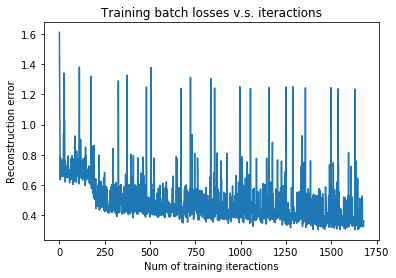

In [17]:
model.fit(x_train, validation_set=x_test)


In [18]:
for f in range(0, len(y_test)):
    if y_test[f] == 4:
        y_test[f] = 0
    else:
        y_test[f] = 1
    
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
costs = model.getFreeEnergy(x_test).reshape(-1)
score = auc(y_test, costs)
print("AUC Score: {:.2%}".format(score))

INFO:tensorflow:Restoring parameters from ./rbm_model2.ckpt
AUC Score: 99.46%


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


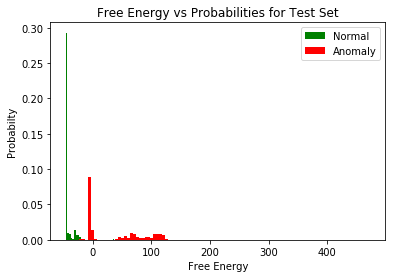

In [398]:
plt.title('Free Energy vs Probabilities for Test Set')
plt.xlabel('Free Energy')
plt.ylabel('Probabilty')
plt.hist(costs[(y_test == 0) & (costs < 500)], bins = 100, color='green', normed=1.0, label='Normal')
plt.hist(costs[(y_test == 1) & (costs < 500)], bins = 100, color='red', normed=1.0, label ='Anomaly')

plt.legend(loc="upper right")
plt.show()